# Normalization -> Z-Score -> 3 STD

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

from scipy.stats import boxcox
from scipy import stats

In [2]:
data = pd.read_csv('../../Capstone/Data/FirstClean_NHL_Skater_Data.csv')
data.head()

,Player,Age,Tm,Pos,GP,G,A,PTS,PlusMinus,PIM,...,BLK,HIT,FOW,FOL,Season,EVa,PPa,SHa,S%,FO%
0,Justin Abdelkader,32,DET,LW,49,0,3,3,-14,25,...,26,103,38,31,2019-20,3,0,0,0.0,55.1
1,Pontus Aberg,26,TOR,LW,5,0,1,1,0,0,...,1,1,0,0,2019-20,1,0,0,0.0,0.0
2,Vitaly Abramov,21,OTT,RW,2,1,0,1,0,2,...,0,0,0,0,2019-20,0,0,0,33.3,0.0
3,Noel Acciari,28,FLA,C,66,20,7,27,2,21,...,103,121,381,414,2019-20,7,0,0,18.5,47.9
4,Andrew Agozzino,29,TOT,LW,22,1,2,3,3,4,...,7,25,38,37,2019-20,2,0,0,10.0,50.7


In [3]:
data.dtypes

Player        object
Age            int64
Tm            object
Pos           object
GP             int64
G              int64
A              int64
PTS            int64
PlusMinus      int64
PIM            int64
PS           float64
EV             int64
PP             int64
SH             int64
GW             int64
S              int64
TOI            int64
BLK            int64
HIT            int64
FOW            int64
FOL            int64
Season        object
EVa            int64
PPa            int64
SHa            int64
S%           float64
FO%          float64
dtype: object

In [4]:
#Separate the numeric columns from the rest of the data
data_num=data.drop(['Player','Tm','Pos','Season'], axis=1)

In [5]:
data_num.head()

,Age,GP,G,A,PTS,PlusMinus,PIM,PS,EV,PP,...,TOI,BLK,HIT,FOW,FOL,EVa,PPa,SHa,S%,FO%
0,32,49,0,3,3,-14,25,-0.9,0,0,...,565,26,103,38,31,3,0,0,0.0,55.1
1,26,5,0,1,1,0,0,0.0,0,0,...,44,1,1,0,0,1,0,0,0.0,0.0
2,21,2,1,0,1,0,2,0.2,1,0,...,12,0,0,0,0,0,0,0,33.3,0.0
3,28,66,20,7,27,2,21,2.9,19,0,...,1054,103,121,381,414,7,0,0,18.5,47.9
4,29,22,1,2,3,3,4,0.3,1,0,...,162,7,25,38,37,2,0,0,10.0,50.7


In [6]:
data_objects=data.drop(['Age', 'GP', 'G', 'A', 'PTS', 'PlusMinus', 'PIM', 'PS', 'EV', 'PP',
       'SH', 'GW', 'S', 'TOI', 'BLK', 'HIT', 'FOW', 'FOL', 'EVa', 'PPa', 'SHa',
       'S%', 'FO%'], axis=1)

In [7]:
data_objects.head()

,Player,Tm,Pos,Season
0,Justin Abdelkader,DET,LW,2019-20
1,Pontus Aberg,TOR,LW,2019-20
2,Vitaly Abramov,OTT,RW,2019-20
3,Noel Acciari,FLA,C,2019-20
4,Andrew Agozzino,TOT,LW,2019-20


## Normalization
__Convert:__

*Positively Skewed*: square root, cube root, log, 1/x

*Negatively Skewed*: square, cubic, exponential

- Scipy Features:
   - Yeojohnson & boxcox are used to normalize the data
   - To use boxcox, all numbers in the column must be positive, if not, use stats.yeojohnson
   - Note: add [0] to output 1 column without adding the lambda column
   - After using Yeojohnson or boxcox, confirm the skewness through .skew().
       - If any values are not between -0.5 and 0.5, use the conversions above to complete the normalization

In [8]:
data_num.skew()

Age          0.597643
GP          -0.236011
G            1.865650
A            1.566721
PTS          1.536354
PlusMinus    0.611449
PIM          2.359929
PS           1.406828
EV           1.736286
PP           2.601965
SH           4.358958
GW           2.182919
S            1.074811
TOI          1.283328
BLK          3.518383
HIT          3.017284
FOW          5.700233
FOL          5.340084
EVa          1.337017
PPa          2.430678
SHa          3.874634
S%           3.753921
FO%          2.343018
dtype: float64

In [9]:
data_num["Age.Skew"]= stats.yeojohnson(data_num["Age"])[0]
data_num["G.Skew"]= stats.yeojohnson(data_num["G"])[0]
data_num["A.Skew"]= stats.yeojohnson(data_num["A"])[0]
data_num["PTS.Skew"]= stats.yeojohnson(data_num["PTS"])[0]
data_num["PlusMinus.Skew"]= stats.yeojohnson(data_num["PlusMinus"])[0]
data_num["PIM.Skew"]= stats.yeojohnson(data_num["PIM"])[0]
data_num["PS.Skew"]= stats.yeojohnson(data_num["PS"])[0]
data_num["EV.Skew"]= stats.yeojohnson(data_num["EV"])[0]
data_num["PP.Skew"]= stats.yeojohnson(data_num["PP"])[0]
data_num["SH.Skew"]= stats.yeojohnson(data_num["SH"])[0]
data_num["GW.Skew"]= stats.yeojohnson(data_num["GW"])[0]
data_num["S.Skew"]= stats.yeojohnson(data_num["S"])[0]
data_num["BLK.Skew"]= stats.yeojohnson(data_num["BLK"])[0]
data_num["HIT.Skew"]= stats.yeojohnson(data_num["HIT"])[0]
data_num["FOW.Skew"]= stats.yeojohnson(data_num["FOW"])[0]
data_num["FOL.Skew"]= stats.yeojohnson(data_num["FOL"])[0]
data_num["EVa.Skew"]= stats.yeojohnson(data_num["EVa"])[0]
data_num["PPa.Skew"]= stats.yeojohnson(data_num["PPa"])[0]
data_num["SHa.Skew"]= stats.yeojohnson(data_num["SHa"])[0]
data_num["S%.Skew"]= stats.yeojohnson(data_num["S%"])[0]
data_num["FO%.Skew"]= stats.yeojohnson(data_num["FO%"])[0]
data_num["TOI.Skew"]= stats.yeojohnson(data_num["TOI"])[0]

In [10]:
data_num_norm=data_num.drop(["Age",
"G",
"A",
"PTS",
"PlusMinus",
"PIM",
"PS",
"EV",
"PP",
"SH",
"GW",
"S",
"BLK",
"HIT",
"FOW",
"FOL",
"EVa",
"PPa",
"SHa",
"S%",'FO%','TOI'],axis=1)

In [11]:
data_num_norm.skew()

GP               -0.236011
Age.Skew          0.020410
G.Skew            0.015645
A.Skew           -0.069250
PTS.Skew         -0.083676
PlusMinus.Skew   -0.123334
PIM.Skew         -0.066806
PS.Skew          -0.045168
EV.Skew           0.025573
PP.Skew           0.450235
SH.Skew           1.855485
GW.Skew           0.386079
S.Skew           -0.162799
BLK.Skew          1.008765
HIT.Skew          0.948214
FOW.Skew          1.806238
FOL.Skew          1.697355
EVa.Skew         -0.077727
PPa.Skew          0.311942
SHa.Skew          1.651418
S%.Skew          -0.073584
FO%.Skew          1.753254
TOI.Skew          0.162445
dtype: float64

In [14]:
data_num_norm['SH.Skew'] = data_num_norm['SH.Skew'].apply(np.cbrt)

In [16]:
data_num_norm['BLK.Skew'] = data_num_norm['BLK.Skew'].apply(np.cbrt)

In [17]:
data_num_norm['HIT.Skew'] = data_num_norm['HIT.Skew'].apply(np.cbrt)

In [18]:
data_num_norm['FOW.Skew'] = data_num_norm['FOW.Skew'].apply(np.cbrt)

In [19]:
data_num_norm['FOL.Skew'] = data_num_norm['FOL.Skew'].apply(np.cbrt)

In [20]:
data_num_norm['SHa.Skew'] = data_num_norm['SHa.Skew'].apply(np.cbrt)

In [21]:
data_num_norm['FO%.Skew'] = data_num_norm['FO%.Skew'].apply(np.cbrt)

In [22]:
data_num_norm.skew()

GP               -0.236011
Age.Skew          0.020410
G.Skew            0.015645
A.Skew           -0.069250
PTS.Skew         -0.083676
PlusMinus.Skew   -0.123334
PIM.Skew         -0.066806
PS.Skew          -0.045168
EV.Skew           0.025573
PP.Skew           0.450235
SH.Skew           1.855391
GW.Skew           0.386079
S.Skew           -0.162799
BLK.Skew          0.949931
HIT.Skew          0.897445
FOW.Skew          1.760946
FOL.Skew          1.646578
EVa.Skew         -0.077727
PPa.Skew          0.311942
SHa.Skew          1.651262
S%.Skew          -0.073584
FO%.Skew          1.753215
TOI.Skew          0.162445
dtype: float64

In [23]:
data_num_norm.columns

Index(['GP', 'Age.Skew', 'G.Skew', 'A.Skew', 'PTS.Skew', 'PlusMinus.Skew',
       'PIM.Skew', 'PS.Skew', 'EV.Skew', 'PP.Skew', 'SH.Skew', 'GW.Skew',
       'S.Skew', 'BLK.Skew', 'HIT.Skew', 'FOW.Skew', 'FOL.Skew', 'EVa.Skew',
       'PPa.Skew', 'SHa.Skew', 'S%.Skew', 'FO%.Skew', 'TOI.Skew'],
      dtype='object')

**_Applying the yeojohnson normalization worked for most of my data. I then tried to manually normalize the data, but some of it would not change._**

## Z Score

In [24]:
# create scaler
scaler = StandardScaler()

# fit and transform in one step
data_num_norm = scaler.fit_transform(data_num_norm)
data_num_zs = pd.DataFrame(data_num_norm)

In [25]:
data_num_zs.columns=['GP', 'Age', 'G', 'A', 'PTS', 'PlusMinus',
       'PIM', 'PS', 'EV', 'PP', 'SH', 'GW',
       'S', 'BLK', 'HIT', 'FOW', 'FOL', 'EVa',
       'PPa', 'SHa', 'S%', 'FO%', 'TOI']

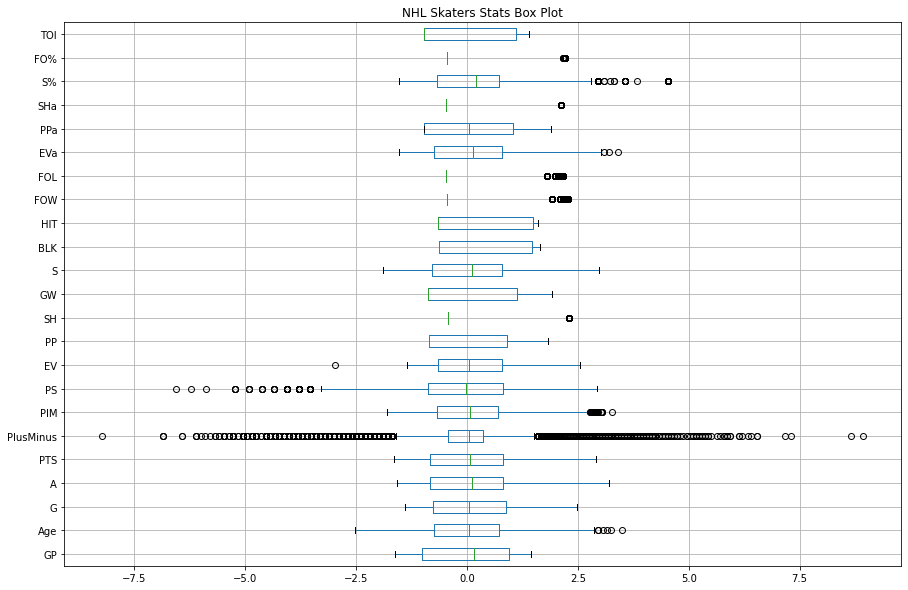

In [26]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('NHL Skaters Stats Box Plot')
plt.show()

**_The data clearly has outliers. Lets see what 3 STD does_**

## 3 STD

In [27]:
for col in data_num_zs.columns:
    u_bound = data_num_zs[col].mean() + 3* data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] > u_bound] = u_bound

In [28]:
for col in data_num_zs.columns:
    l_bound = data_num_zs[col].mean() - 3*data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] < l_bound] = l_bound

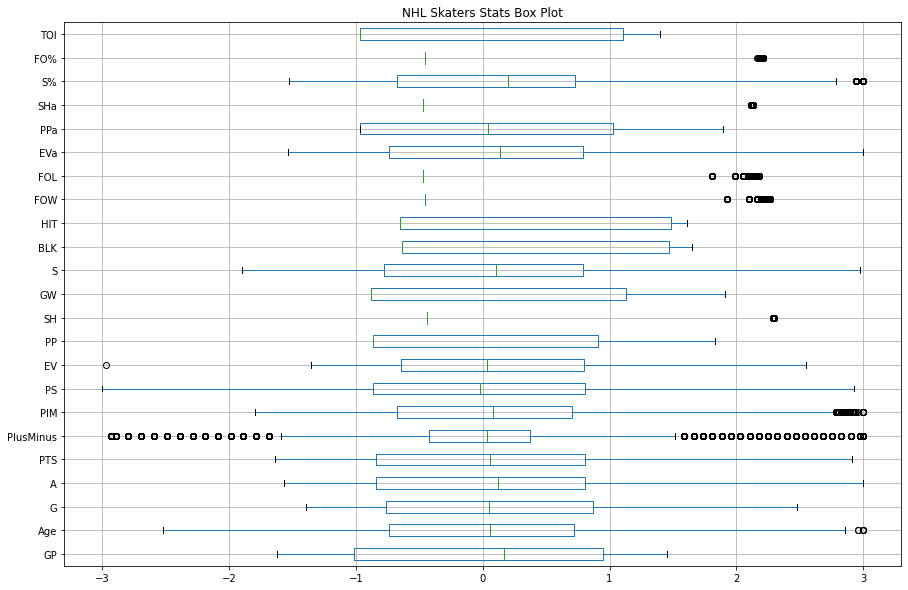

In [29]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('NHL Skaters Stats Box Plot')
plt.show()

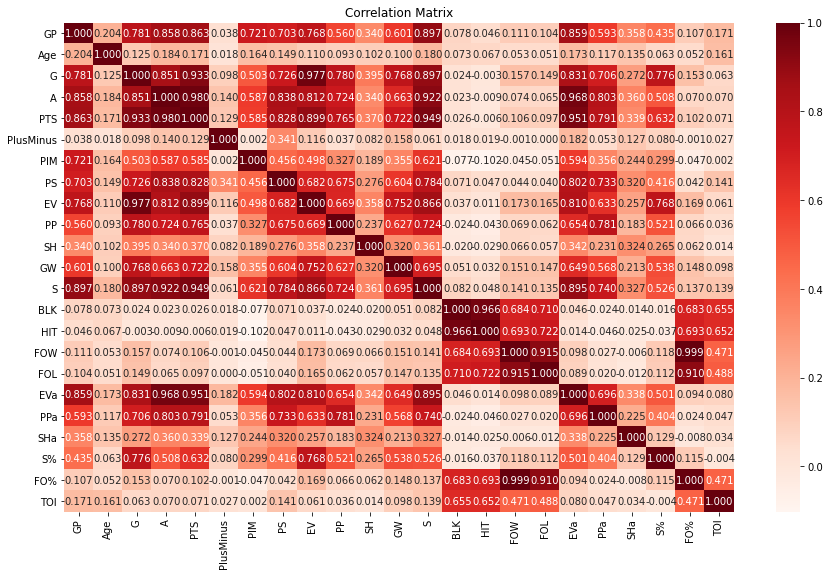

In [30]:
corr = data_num_zs.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Reds")
plt.title("Correlation Matrix")
plt.show()

In [31]:
NHL_Spipeline1=pd.concat([data_objects, data_num_zs], axis=1)

In [32]:
NHL_Spipeline1.head()

,Player,Tm,Pos,Season,GP,Age,G,A,PTS,PlusMinus,...,BLK,HIT,FOW,FOL,EVa,PPa,SHa,S%,FO%,TOI
0,Justin Abdelkader,DET,LW,2019-20,0.129322,1.275748,-1.392401,-0.627304,-0.843865,-1.195139,...,1.620722,1.597031,2.265950,2.170863,-0.497183,-0.967626,-0.471173,-1.523824,2.207628,1.058415
1,Pontus Aberg,TOR,LW,2019-20,-1.440610,0.057177,-1.392401,-1.122613,-1.263628,0.123334,...,1.154371,1.039483,-0.452768,-0.473088,-1.052503,-0.967626,-0.471173,-1.523824,-0.453231,0.373404
2,Vitaly Abramov,OTT,RW,2019-20,-1.547651,-1.370347,-0.760365,-1.566057,-1.263628,0.123334,...,-0.634327,-0.649424,-0.452768,-0.473088,-1.538308,-0.967626,-0.471173,2.180947,-0.453231,-0.018214
3,Noel Acciari,FLA,C,2019-20,0.735886,0.510296,1.274448,-0.074064,0.656002,0.289506,...,1.646544,1.599535,2.268602,2.176225,0.137600,-0.967626,-0.471173,1.257028,2.207148,1.206199
4,Andrew Agozzino,TOT,LW,2019-20,-0.834046,0.717684,-0.760365,-0.839545,-0.843865,0.370171,...,1.540996,1.554950,2.265950,2.172088,-0.736708,-0.967626,-0.471173,0.484376,2.207354,0.739369


In [33]:
NHL_Spipeline1.to_csv('../../Capstone/Data/NHL_Spipeline1.csv', index=0)

Features highly correlated to the target(PS):
GP, G, A, PTS, EV, PP, GW, S, EVa, PPa